In [1]:
import numpy as nu
import matplotlib.pyplot as plt
from galpy.potential import SCFPotential, HernquistPotential, NFWPotential, compute_coeffs_spherical,compute_coeffs_axi, compute_coeffs
from galpy.potential import FlattenedPowerPotential
from IPython.display import display, Math, Latex
from galpy.util.bovy_coords import cyl_to_spher, spher_to_cyl
%matplotlib inline  


In [2]:
h = HernquistPotential(amp=1, a=1)
nfw = NFWPotential(amp=1, a=1)

def rho_Spherical(R, z=0, phi=0.):
    return h.dens(R,z)

def rho_NFW(R, z=0, phi=0):
    return nfw.dens(R, z)

In [3]:
Acos, Asin = compute_coeffs_spherical(rho_Spherical,2, 1.)
scf = SCFPotential(Acos=Acos,Asin=Asin)

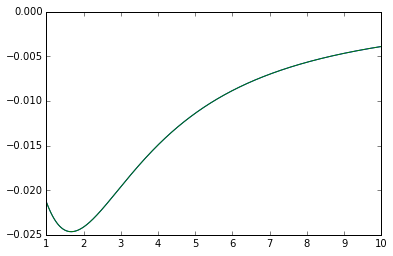

In [4]:
R = nu.linspace(1.,10,1000)
plt.plot(R, scf._Rforce(R,2,1))
plt.plot(R, h._Rforce(R, 2, 1))

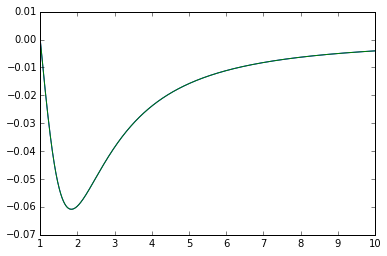

In [5]:
z = nu.linspace(0.,10,1000)
plt.plot(R, scf._zforce(1,z,1))
plt.plot(R, h._zforce(1, z, 1))

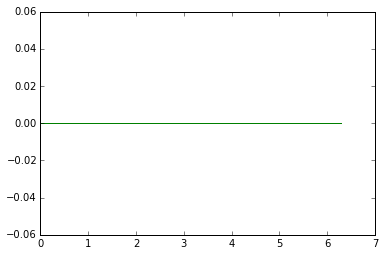

In [6]:
phi = nu.linspace(0, 2*nu.pi,1000)
plt.plot(phi, scf._phiforce(2.,1.,phi))
plt.plot(phi, h._phiforce(2., 1., phi)*nu.ones((1000))) ## h._phiforce(2., 1., phi) returns a float even though phi is an array

In [7]:
Acos, Asin = compute_coeffs_spherical(rho_NFW,200, 1.)
scf = SCFPotential(Acos=Acos,Asin=Asin)


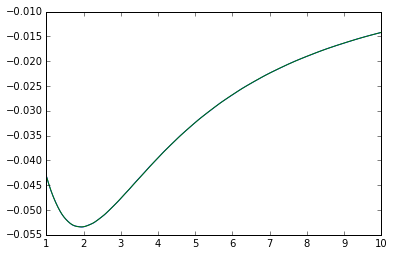

In [8]:
plt.plot(R, scf._Rforce(R,2,1))
plt.plot(R, nfw._Rforce(R, 2, 1))

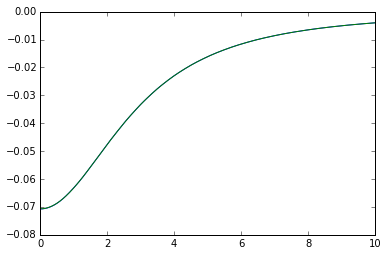

In [9]:
plt.plot(z, scf._Rforce(3,z,1))
plt.plot(z, nfw._Rforce(3, z, 1))

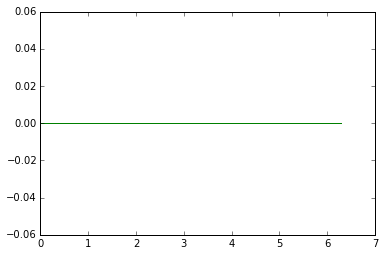

In [10]:
plt.plot(phi, scf._phiforce(2,2,phi))
plt.plot(phi, nfw._phiforce(2, 2, phi)*nu.ones((1000)))

In [11]:
fp = FlattenedPowerPotential()

In [12]:
Acos, Asin = compute_coeffs_axi(fp.dens,30, 30)
scf = SCFPotential(Acos=Acos,Asin=Asin)

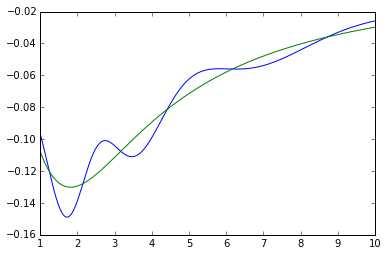

In [13]:
plt.plot(R, scf._Rforce(R,2,1))
plt.plot(R, fp._Rforce(R, 2, 1))

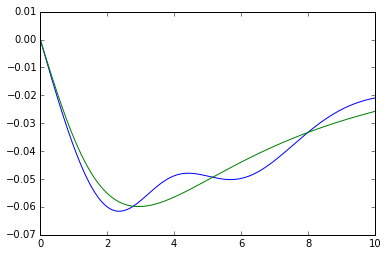

In [14]:
plt.plot(z, scf._zforce(4,z,1))
plt.plot(z, fp._zforce(4, z, 1))

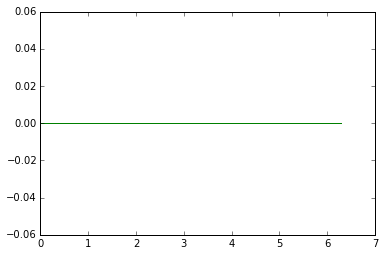

In [15]:
plt.plot(phi, scf._phiforce(1,2,phi))
plt.plot(phi, fp._phiforce(1, 2, phi)*nu.ones((1000)))